In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


p, q, r, s, beta, w1, w2, e = 2.0*10**-4, 1.0* 10**-3, 2.0* 10**-5, 9.7* 10**-5, 5.0, 0.83, 0.88, 5 * 10**-7

dt = 1
T = 30000

x0= [.11,.3,.1175,.11,.3,.1175]

## Bi-Directional Coupling

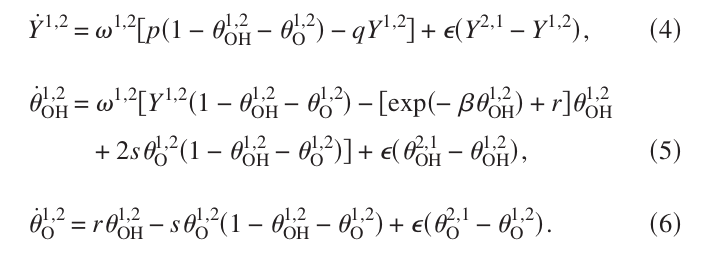

In [146]:
def solve_plot(f):
    t_step = int(T/dt)
    t = np.linspace(0, T, t_step)
    solution = solve_ivp(
        fun=lambda t, x: f(t, x),
        t_span=(0,T), 
        y0=x0,            
        method="RK45",  
        t_eval=np.linspace(0, T, t_step)
    )
    
    X = solution.y.T
    
    plt.figure(figsize=(16, 6))
    
    plt.subplot(121)
    plt.plot(t, X[:, 1], label="OH1")
    plt.plot(t, X[:, 4], label="OH2")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Time Series")
    plt.legend()
    
    plt.subplot(122)
    plt.plot(X[:, 1], X[:, 4], label="OH1 vs OH2")
    plt.xlabel("OH1")
    plt.ylabel("OH2")
    plt.title("Phase Space")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    return solution

def bi_coupling(t,x):
    dx = np.zeros(6)
    dx[0] = w1 * (p * (1 - x[1] - x[2]) - q * x[0]) + e * (x[3] - x[0])
    dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* x[1] + 2 * s * x[2] * (1 - x[1] - x[2])) + e * (x[4] - x[1])
    dx[2] = r * x[1] - s * x[2] * (1 - x[1] - x[2]) + e * (x[5] - x[2])
    dx[3] = w2 * (p * (1 - x[4] - x[5]) - q * x[3]) + e * (x[0] - x[3])
    dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
    dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5]) + e * (x[2] - x[5])
    
    return np.array(dx)


## Figure-2, Figure-3

/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: overflow encountered in exp
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_4091/3109974815.py:38: RuntimeWarning: overflow encountered in exp
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* x[1] + 2 * s * x[2] * (1 - x[1] - x[2])) + e * (x[4] - x[1])
/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: invalid value encountered in scalar add
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_4091/3109974815.py:42: RuntimeWarning: invalid value encountered in scalar subtract
  dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5]) + e * (x[2] - x[5])
/tmp/ipykernel_4091/3109974815.py:38: RuntimeWarning: invalid value encountered in scalar subtract
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  +

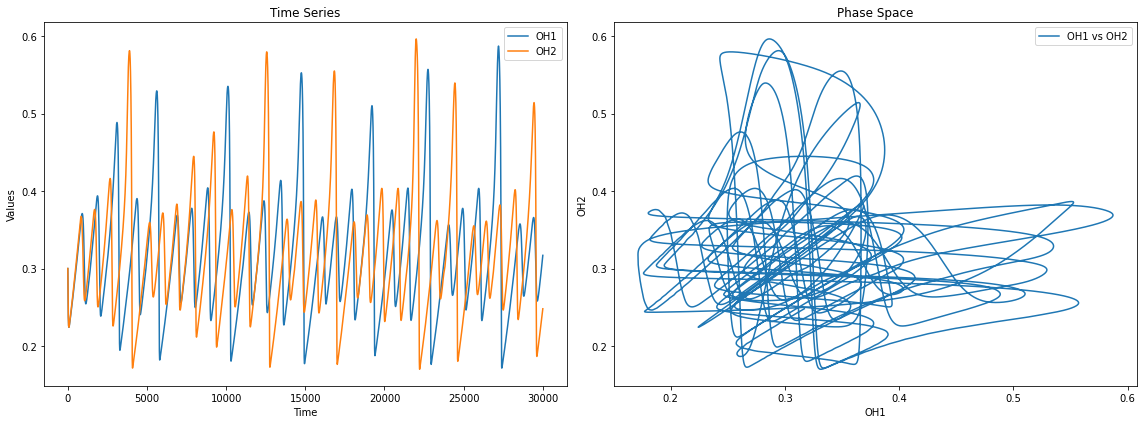

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  3.000e+04  3.000e+04]
        y: [[ 1.100e-01  1.100e-01 ...  1.151e-01  1.151e-01]
            [ 3.000e-01  2.976e-01 ...  3.168e-01  3.170e-01]
            ...
            [ 3.000e-01  2.975e-01 ...  2.479e-01  2.481e-01]
            [ 1.175e-01  1.175e-01 ...  1.169e-01  1.169e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 4064
     njev: 0
      nlu: 0

In [147]:
solve_plot(bi_coupling)

## Figure-4, Figure-5

/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: overflow encountered in exp
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_4091/3109974815.py:38: RuntimeWarning: overflow encountered in exp
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* x[1] + 2 * s * x[2] * (1 - x[1] - x[2])) + e * (x[4] - x[1])
/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: invalid value encountered in scalar add
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_4091/3109974815.py:42: RuntimeWarning: invalid value encountered in scalar subtract
  dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5]) + e * (x[2] - x[5])
/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  +

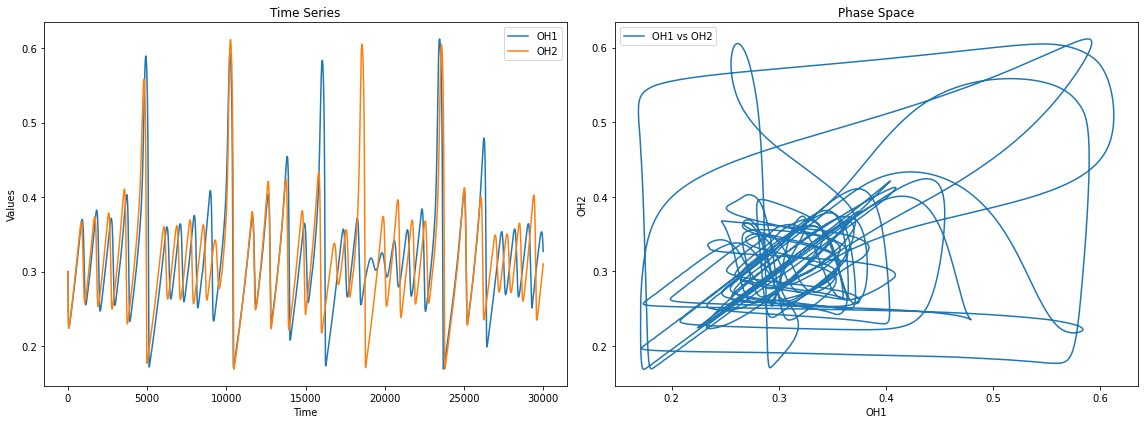

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  3.000e+04  3.000e+04]
        y: [[ 1.100e-01  1.100e-01 ...  1.133e-01  1.133e-01]
            [ 3.000e-01  2.976e-01 ...  3.277e-01  3.271e-01]
            ...
            [ 3.000e-01  2.975e-01 ...  3.100e-01  3.102e-01]
            [ 1.175e-01  1.175e-01 ...  1.158e-01  1.158e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3662
     njev: 0
      nlu: 0

In [148]:
e = 12.3 * 10**-5
solve_plot(bi_coupling)

## Figure-6, Figure-7

/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: overflow encountered in exp
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_4091/3109974815.py:38: RuntimeWarning: overflow encountered in exp
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* x[1] + 2 * s * x[2] * (1 - x[1] - x[2])) + e * (x[4] - x[1])
/tmp/ipykernel_4091/3109974815.py:41: RuntimeWarning: invalid value encountered in scalar add
  dx[4] = w2 * (x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4])  + r)* x[4] + 2 * s * x[5] * (1 - x[4] - x[5])) + e * (x[1] - x[4])
/tmp/ipykernel_4091/3109974815.py:42: RuntimeWarning: invalid value encountered in scalar subtract
  dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5]) + e * (x[2] - x[5])
/tmp/ipykernel_4091/3109974815.py:38: RuntimeWarning: invalid value encountered in scalar add
  dx[1] = w1 * (x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1])  + r)* 

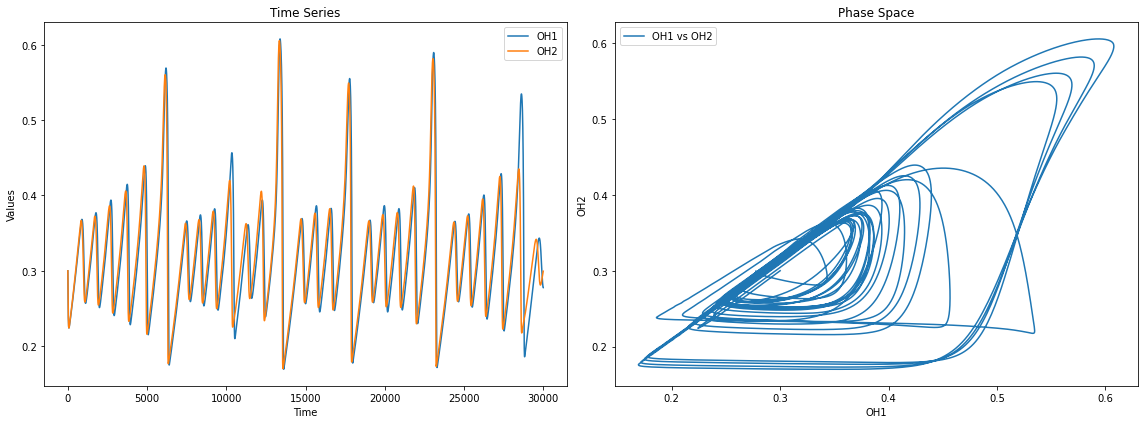

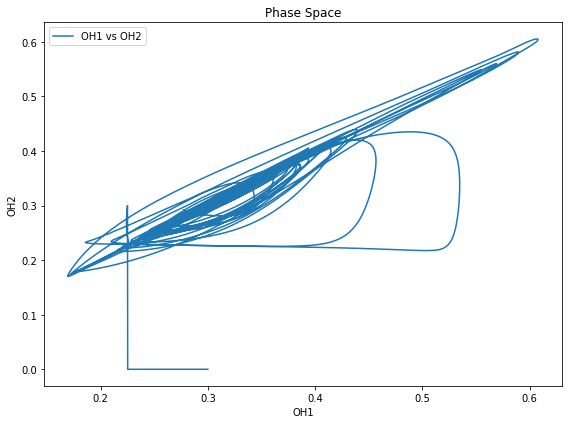

In [149]:
e = 5 * 10**-4
# solve_plot(bi_coupling)
solution = solve_plot(bi_coupling)
state_variables = solution.y

# Access specific variables
series_1 = state_variables[1, :]  # Second state variable
series_2 = state_variables[4, :]

tau = 57  
padding = [0] * tau 

shifted_series_2 = np.concatenate((padding, series_2))[:len(series_2)]

plt.figure(figsize=(8, 6))

plt.plot(series_1,shifted_series_2, label="OH1 vs OH2")
plt.xlabel("OH1")
plt.ylabel("OH2")
plt.title("Phase Space")
plt.legend()

plt.tight_layout()
plt.show()


## Figure-8, Figure-9

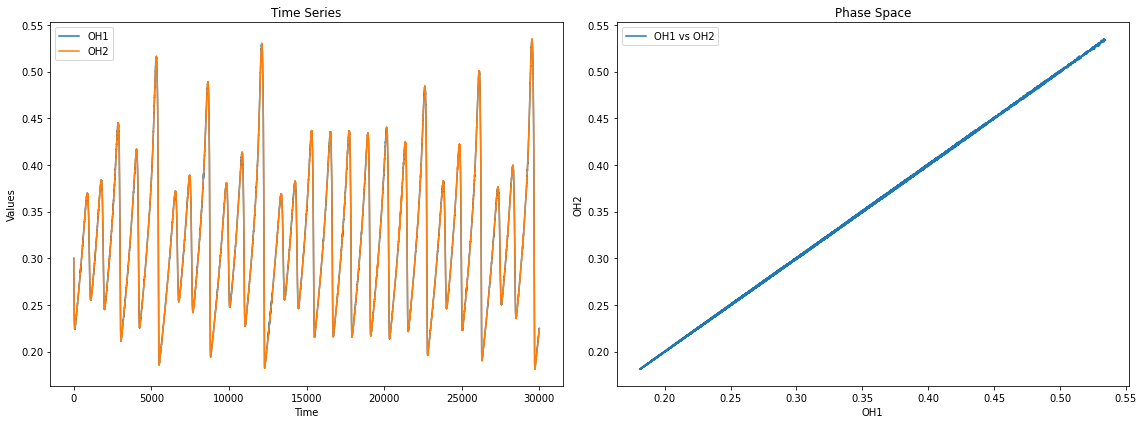

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e+00 ...  3.000e+04  3.000e+04]
        y: [[ 1.100e-01  1.100e-01 ...  1.113e-01  1.113e-01]
            [ 3.000e-01  2.976e-01 ...  2.251e-01  2.251e-01]
            ...
            [ 3.000e-01  2.975e-01 ...  2.244e-01  2.247e-01]
            [ 1.175e-01  1.175e-01 ...  1.173e-01  1.173e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62732
     njev: 0
      nlu: 0

In [150]:
e = 0.5
solve_plot(bi_coupling)

## Uni-Directional Coupling

In [151]:
from ddeint import ddeint
e, tau1, tau2, T=0.05, 0, 0, 15000

# Define the history function for past values
def history(t):
    return np.zeros(6)  # Initial values for all components

# Define the DDE function
def uni_coupling(X, t):
    x = X(t)       # Current state
    x_tau1 = X(t - tau1)  # Delayed state for tau1
    x_tau2 = X(t - tau2)  # Delayed state for tau2
    
    dx = np.zeros(6)
    dx[0] = p * (1 - x[1] - x[2]) - q * x[0]
    dx[1] = x[0] * (1 - x[1] - x[2]) - (np.exp((-beta) * x[1]) + r) * x[1] + 2 * s * x[2] * (1 - x[1] - x[2])
    dx[2] = r * x[1] - s * x[2] * (1 - x[1] - x[2])
    dx[3] = p * (1 - x[4] - x[5]) - q * x[3]
    dx[4] = x[3] * (1 - x[4] - x[5]) - (np.exp((-beta) * x[4]) + r) * x[4] + 2 * s * x[5] * (1 - x[4] - x[5]) + e * (x_tau1[1] - x_tau2[4])
    dx[5] = r * x[4] - s * x[5] * (1 - x[4] - x[5])
    
    return dx

def solve_dde(f):
    t_step = int(T/dt)
    t = np.linspace(0, T, t_step)
    # Solve the DDE
    solution = ddeint(uni_coupling, history, t)
    
    # Plot the results
    plt.figure(figsize=(16, 6))
    
    # Time series
    plt.subplot(121)
    plt.plot(t, solution[:, 1], label="OH1")
    plt.plot(t, solution[:, 4], label="OH2")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Time Series")
    plt.legend()
    
    # Phase space
    plt.subplot(122)
    plt.plot(solution[:, 1], solution[:, 4], label="OH1 vs OH2")
    plt.xlabel("OH1")
    plt.ylabel("OH2")
    plt.title("Phase Space")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    return solution

## Figure-12, Figure-13

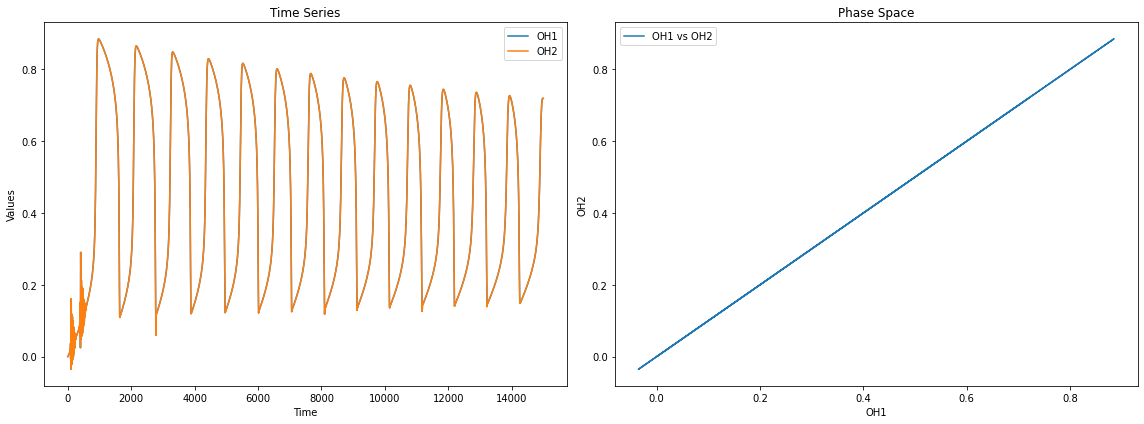

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00013334e-04, 0.00000000e+00, 0.00000000e+00, 2.00013334e-04,
        0.00000000e+00, 0.00000000e+00],
       [3.99881669e-04, 1.44999891e-04, 0.00000000e+00, 3.99881669e-04,
        1.44999891e-04, 0.00000000e+00],
       ...,
       [1.04725508e-01, 7.19336004e-01, 9.37211086e-02, 1.04725508e-01,
        7.19336004e-01, 9.37211086e-02],
       [1.04657742e-01, 7.19235733e-01, 9.37338115e-02, 1.04657742e-01,
        7.19235733e-01, 9.37338115e-02],
       [1.04589994e-01, 7.19133188e-01, 9.37465138e-02, 1.04589994e-01,
        7.19133188e-01, 9.37465138e-02]])

In [152]:
solve_dde(uni_coupling)

## Figure-14

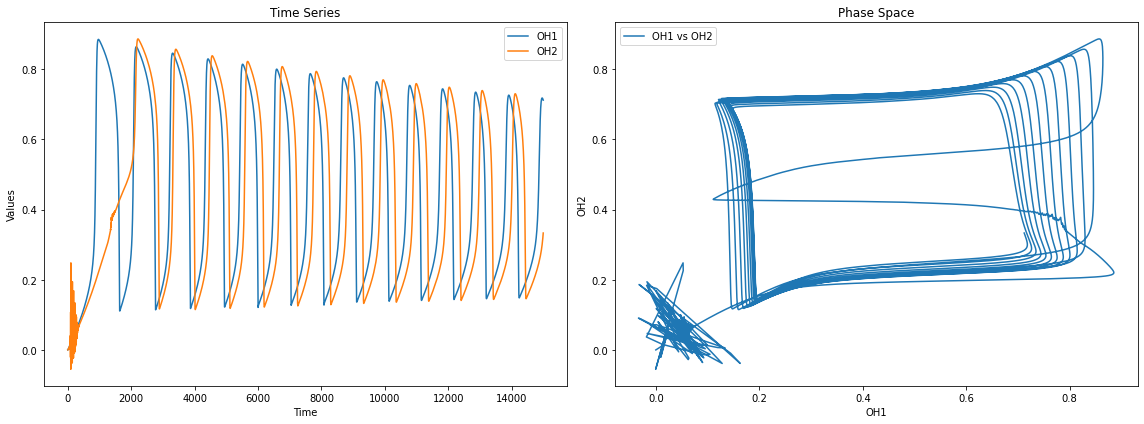

In [153]:
tau1 = 1250

solution = solve_dde(uni_coupling)


### Figure-15

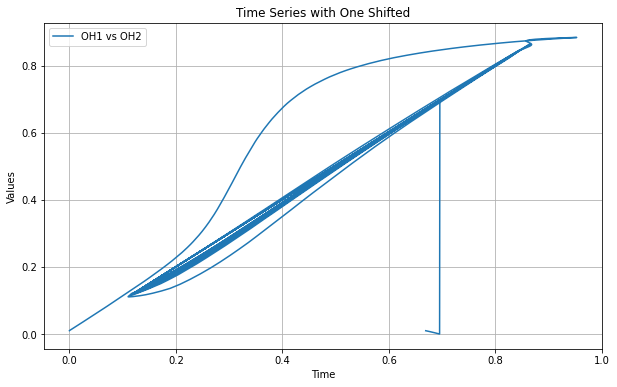

In [163]:
time_series_1 = solution[:, 4]
time_series_2 = solution[:, 1]

# Shift the second time series
shift_amount = -50# Number of steps to shift
shifted_time_series_2 = np.roll(time_series_2, shift_amount)

# Generate time indices
time = np.arange(len(solution))

# Plot the original and shifted time series
plt.figure(figsize=(10, 6))
plt.plot(time_series_1, shifted_time_series_2, label="OH1 vs OH2")

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Time Series with One Shifted")
plt.legend()
plt.grid()
plt.show()

## Anticipation Synchronization

### Figure-16

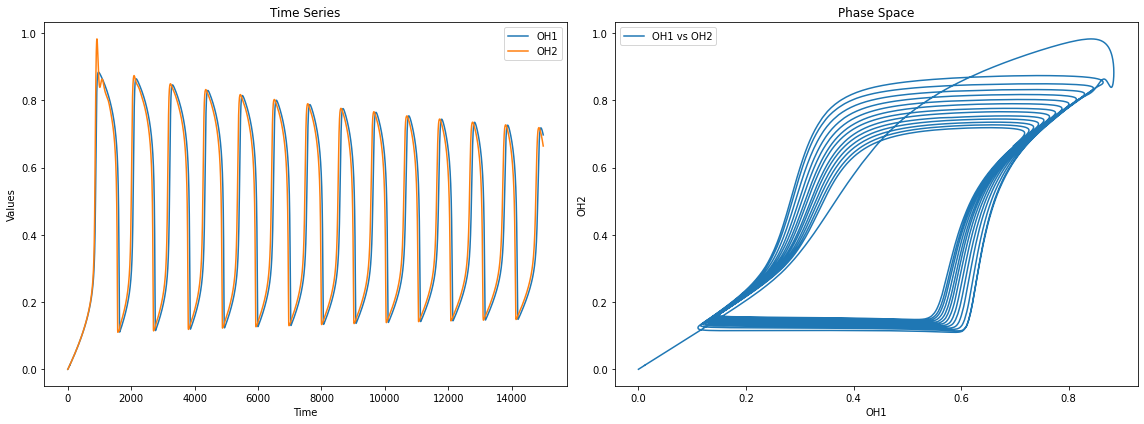

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00013334e-04, 0.00000000e+00, 0.00000000e+00, 2.00013334e-04,
        0.00000000e+00, 0.00000000e+00],
       [3.99881669e-04, 1.44999891e-04, 0.00000000e+00, 3.99881669e-04,
        1.44999891e-04, 0.00000000e+00],
       ...,
       [1.00487278e-01, 6.98303883e-01, 9.43048643e-02, 9.70483033e-02,
        6.65677075e-01, 9.48514542e-02],
       [1.00428143e-01, 6.97869749e-01, 9.43169450e-02, 9.69989981e-02,
        6.65044076e-01, 9.48625811e-02],
       [1.00369197e-01, 6.97431862e-01, 9.43290087e-02, 9.69499225e-02,
        6.64402577e-01, 9.48736833e-02]])

In [155]:
e,tau1, tau2= 0.02,0, 64
solve_dde(uni_coupling)

### Figure-17

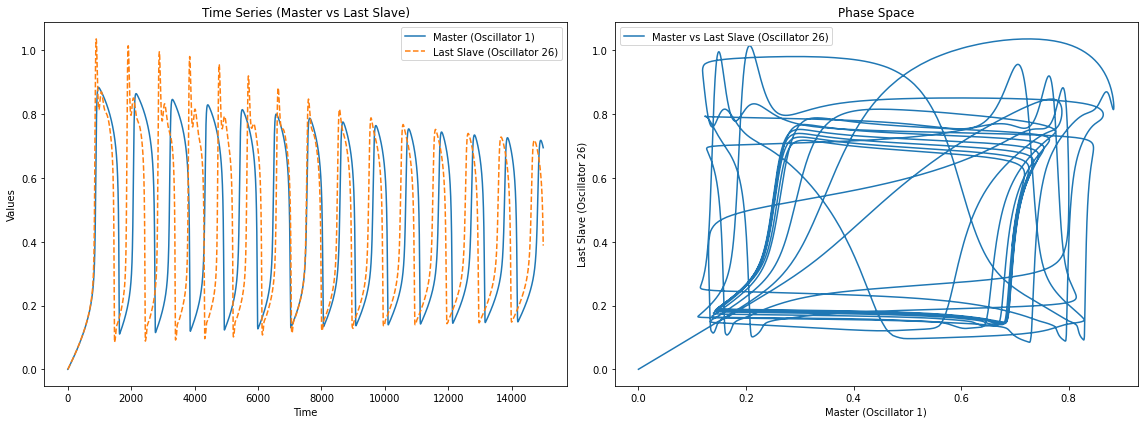

In [156]:
from ddeint import ddeint
import numpy as np
import matplotlib.pyplot as plt

# Define the history function for past values
def history(t):
    return np.zeros(num_oscillators * 3)  # Initial values for all oscillators

# Define the DDE function with a linear chain coupling
def linear_chain_coupling(X, t, num_oscillators, p, q, r, s, beta, e, tau1, tau2):
    x = X(t)       # Current state
    x_tau1 = X(t - tau1)  # Delayed state for tau1
    x_tau2 = X(t - tau2)  # Delayed state for tau2
    
    dx = np.zeros(num_oscillators * 3)  # Three variables per oscillator (x1, x2, x3)
    
    for i in range(num_oscillators):
        idx = i * 3  # Index for oscillator i
        if i == 0:  # Master oscillator (no coupling)
            dx[idx] = p * (1 - x[idx+1] - x[idx+2]) - q * x[idx]
            dx[idx+1] = x[idx] * (1 - x[idx+1] - x[idx+2]) - (np.exp((-beta) * x[idx+1]) + r) * x[idx+1] + 2 * s * x[idx+2] * (1 - x[idx+1] - x[idx+2])
            dx[idx+2] = r * x[idx+1] - s * x[idx+2] * (1 - x[idx+1] - x[idx+2])
        else:  # Slave oscillators (coupled to the previous oscillator)
            prev_idx = (i - 1) * 3  # Index of the previous oscillator
            dx[idx] = p * (1 - x[idx+1] - x[idx+2]) - q * x[idx]
            dx[idx+1] = x[idx] * (1 - x[idx+1] - x[idx+2]) - (np.exp((-beta) * x[idx+1]) + r) * x[idx+1] + 2 * s * x[idx+2] * (1 - x[idx+1] - x[idx+2]) + e * (x_tau1[prev_idx+1] - x_tau2[idx+1])
            dx[idx+2] = r * x[idx+1] - s * x[idx+2] * (1 - x[idx+1] - x[idx+2])
    
    return dx

# Solver function for linear chain
def solve_linear_chain(num_oscillators, p, q, r, s, beta, e, tau1, tau2, T, dt):
    t_step = int(T / dt)
    t = np.linspace(0, T, t_step)

    # Solve the DDE
    solution = ddeint(
        lambda X, t: linear_chain_coupling(X, t, num_oscillators, p, q, r, s, beta, e, tau1, tau2),
        history,
        t,
    )

    # Plot the results
    plt.figure(figsize=(16, 6))

    # Plot time series of master and last slave
    plt.subplot(121)
    plt.plot(t, solution[:, 1], label="Master (Oscillator 1)")
    plt.plot(t, solution[:, -2], label=f"Last Slave (Oscillator {num_oscillators})", linestyle="--")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.title("Time Series (Master vs Last Slave)")
    plt.legend()

    # Plot phase space of master vs last slave
    plt.subplot(122)
    plt.plot(solution[:, 1], solution[:, -2], label=f"Master vs Last Slave (Oscillator {num_oscillators})")
    plt.xlabel("Master (Oscillator 1)")
    plt.ylabel(f"Last Slave (Oscillator {num_oscillators})")
    plt.title("Phase Space")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return solution


e, tau1, tau2 = 0.02, 0.0, 50.0
T, dt = 15000, 1
num_oscillators = 26  # Total number of oscillators in the chain

# Solve and plot
solution = solve_linear_chain(num_oscillators, p, q, r, s, beta, e, tau1, tau2, T, dt)


### Figure-18

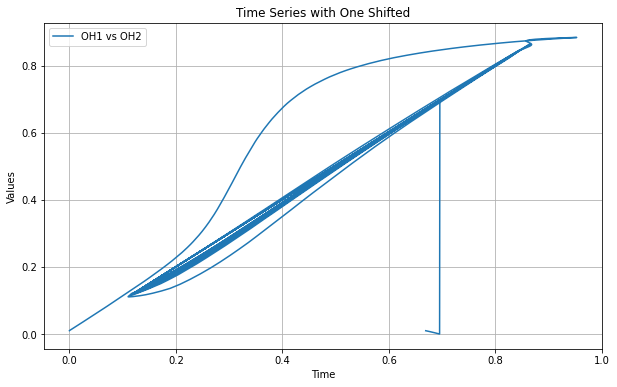

In [161]:
time_series_1 = solution[:, 4]
time_series_2 = solution[:, 1]

# Shift the second time series
shift_amount = -50 # Number of steps to shift
shifted_time_series_2 = np.roll(time_series_2, shift_amount)

# Generate time indices
time = np.arange(len(solution))

# Plot the original and shifted time series
plt.figure(figsize=(10, 6))
plt.plot(time_series_1, shifted_time_series_2, label="OH1 vs OH2")

# Add labels, legend, and title
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("Time Series with One Shifted")
plt.legend()
plt.grid()
plt.show()